In [201]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [202]:
df = pd.read_csv('D:/류영표강사20230501/archive/insurance.csv')

In [203]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [204]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [205]:
df.shape

(1338, 7)

In [206]:
df.size

9366

In [207]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [209]:
df.iloc[499]  # 500번째 데이터 꺼내기

age                62
sex            female
bmi              39.2
children            0
smoker             no
region      southwest
charges      13470.86
Name: 499, dtype: object

In [210]:
# charges 오름차순
df.sort_values(by='charges',ascending=True).head()

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110


In [211]:
# age' 열을 오름차순으로 먼저 정렬하고,
# 'age' 열 값이 동일한 경우에는 'smoker' 열을 오름차순으로 정렬
df.sort_values(by=['age','smoker']).head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075


In [212]:
df.sort_index().head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [213]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [214]:
from sklearn.preprocessing import MinMaxScaler

# 범주형 변수 더미 변수화
df_encoded = pd.get_dummies(df, drop_first=True)

# 독립 변수와 종속 변수 분할
X = df_encoded.drop('charges', axis=1)  # 독립 변수
y = df_encoded['charges']  # 종속 변수

# 데이터 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 결과 확인
y_pred = model.predict(X_test)
print(y_pred)


[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656 10864.11316424   170.28084136 16903.45028662
  1092.43093614 11218.34318352 28101.68455267  9377.73460205
  5263.0595179  38416.04221107 40255.82339284 37098.25353123
 15240.39392306 35912.88264434  9112.52398703 31461.92108909
  3847.68845883 10130.12001517  2370.54189389  7140.21550828
 11301.76782638 12961.65366224 14509.47251876  6159.8976107
  9963.85857263  2177.85718217  9115.93673493 13073.68932159
  4561.82376202  3408.20756033  4459.81359745 13032.06505076
  1979.99357292  8813.28303302 33271.29124448 32585.51583927
  3908.76090964  4326.10774721 14142.81326533 11423.45494846
  8774.13955311 12097.28051001  5281.57353499  3150.5596042
 35494.46461214  9150.1124786  15836.84575621  2343.57470069
 12364.78414194  1482.29488266 13389.06105161 12573.57395972
  4341.83680558 32165.33688042 13321.3360032  12896.82071102
 14167.99421483 10506.17623512 16360.78543548  7763.89824584
 11839.25019431  4061.1975

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


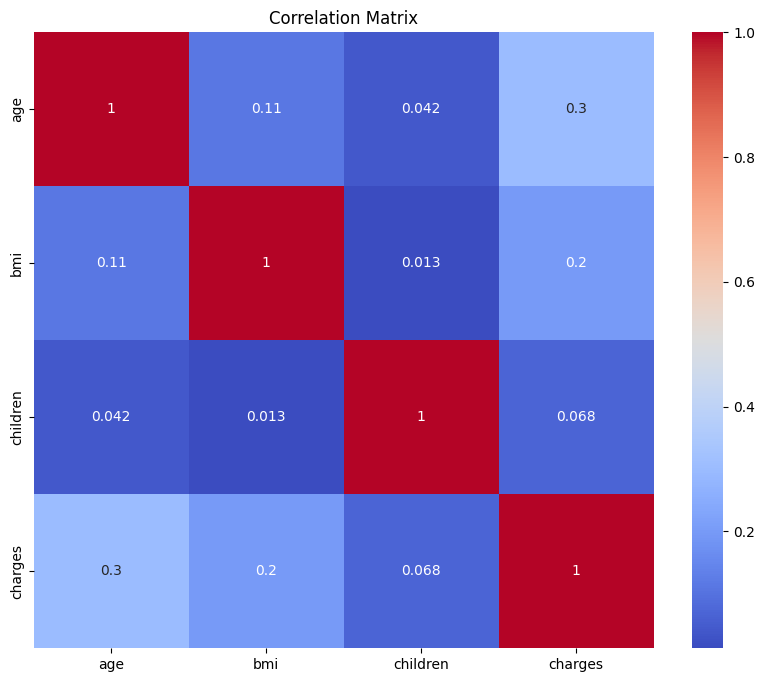

In [215]:
import seaborn as sns

# 숫자형 변수들 간의 상관관계 행렬 계산
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# 상관계수 heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



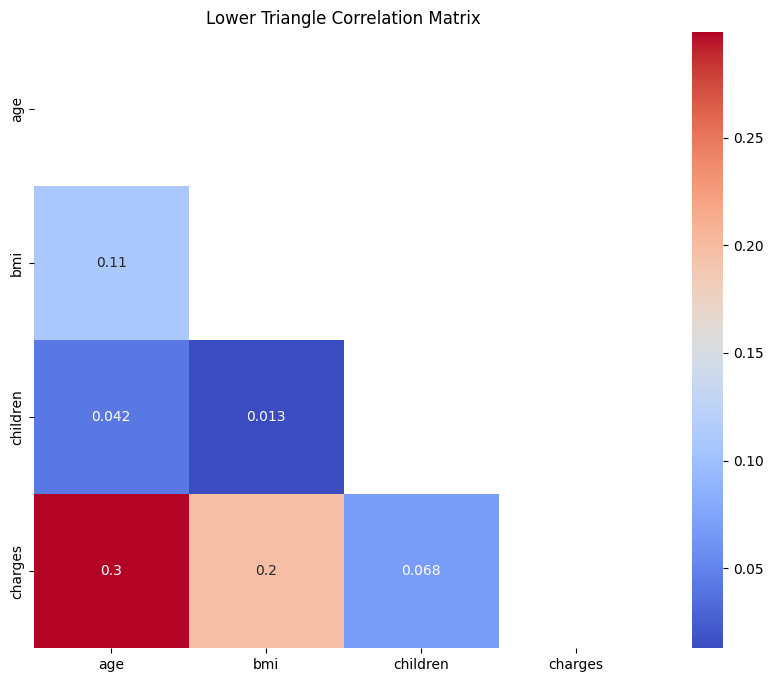

In [218]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수들 간의 상관관계 행렬 계산
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# 하삼각행렬 생성
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 상관계수 하삼각행렬 heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Lower Triangle Correlation Matrix')
plt.show()


In [219]:
correlation_matrix
charges       1.000000
smoker_num    0.787251
age           0.299008
bmi           0.198341
children      0.067998
Name: charges, dtype: float64

SyntaxError: invalid syntax (1186385377.py, line 2)

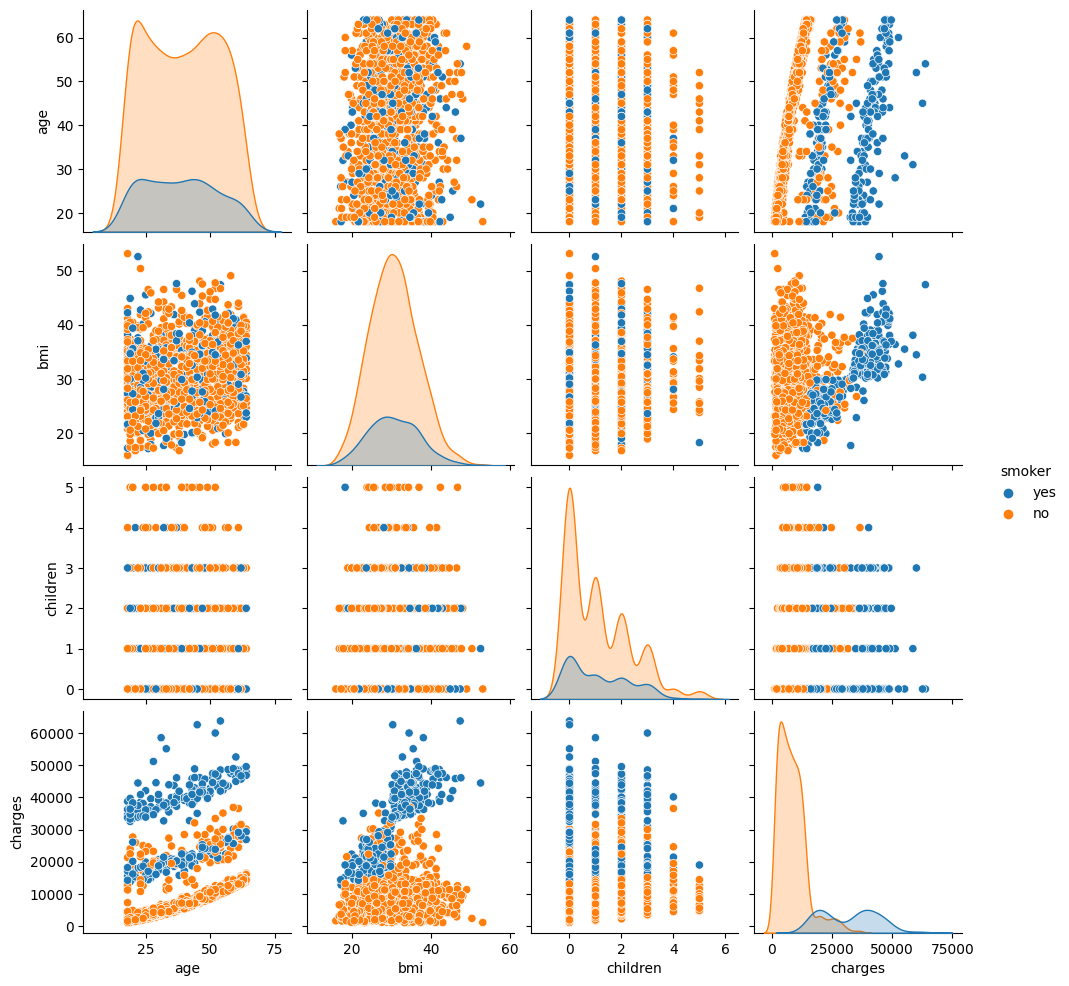

In [220]:
sns.pairplot(df, hue='smoker')

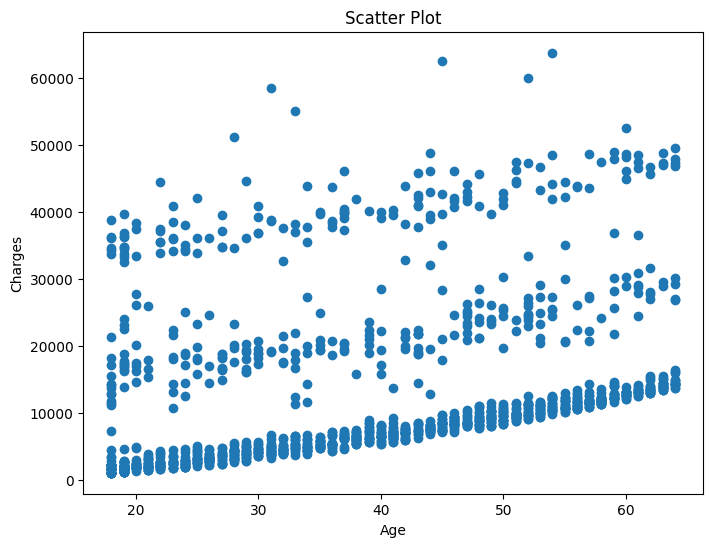

In [ ]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot')
plt.show()


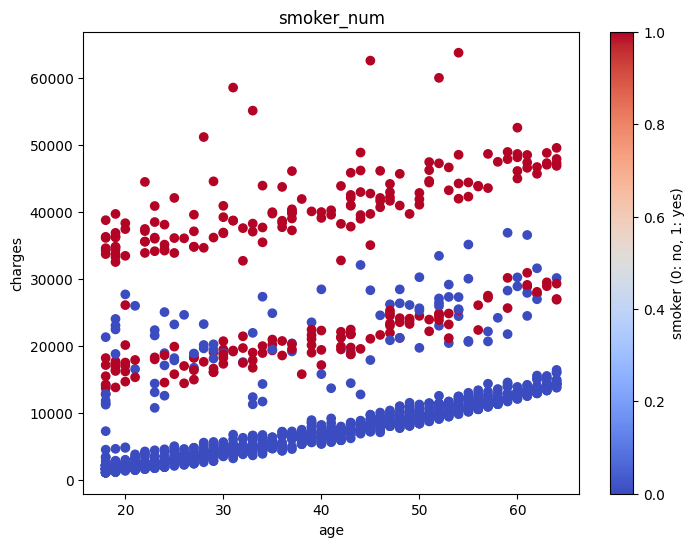

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 'smoker' 열을 숫자 값으로 매핑
df['smoker_num'] = np.where(df['smoker'] == 'yes', 1, 0)

# 흡연 여부를 색으로 표시한 산점도
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'], c=df['smoker_num'], cmap='coolwarm')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('smoker_num')
plt.colorbar(label='smoker (0: no, 1: yes)')
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include='number')  # 숫자형 열만 선택
insur_corr = numeric_df.corr()
insur_order = insur_corr.loc[:, 'charges'].abs().sort_values(ascending=False)
insur_order


charges       1.000000
smoker_num    0.787251
age           0.299008
bmi           0.198341
children      0.067998
Name: charges, dtype: float64

In [ ]:
# 특성을 `x`와 `y`로 구분합니다.
x = df.drop('charges', axis=1)
y = df['charges']

# 훈련 세트와 테스트 세트를 75:25의 비율로 분할합니다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# 데이터프레임의 상단을 인쇄합니다.
print(x_train.head())
print(x_test.head())



      age     bmi  children smoker  sex_female  sex_male  region_northeast   
1098   52  30.875         0     no        True     False              True  \
1264   49  33.345         2     no        True     False              True   
86     57  31.160         0    yes        True     False             False   
1042   20  30.685         0    yes       False      True              True   
268    45  30.200         1     no       False      True             False   

      region_northwest  region_southeast  region_southwest  
1098             False             False             False  
1264             False             False             False  
86                True             False             False  
1042             False             False             False  
268              False             False              True  
      age    bmi  children smoker  sex_female  sex_male  region_northeast   
597    34  33.25         1     no        True     False              True  \
233    59  